In [1]:
import numpy as np
import pandas as pd

In [11]:
file = 'spam.csv' 

In [12]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [13]:
df = pd.read_csv(file,encoding='Windows-1252')

In [14]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3589,ham,I am in escape theatre now. . Going to watch K...,NaN,NaN,NaN
4959,ham,I want &lt;#&gt; rs da:)do you have it?,NaN,NaN,NaN
4779,ham,Sen told that he is going to join his uncle fi...,NaN,NaN,NaN
2398,ham,YO YO YO BYATCH WHASSUP?,NaN,NaN,NaN
4385,ham,", im .. On the snowboarding trip. I was wonder...",NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [23]:
df.sample(5)

,v1,v2
1582,ham,"Yep, at derek's house now, see you Sunday &lt;3"
5371,ham,"Lol, oh you got a friend for the dog ?"
4962,ham,I want to see your pretty pussy...
5247,ham,Gud ni8 dear..slp well..take care..swt dreams....
3871,ham,I am joining today formally.Pls keep praying.w...


In [25]:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)

In [27]:
df.sample(5)

,Target,Text
511,ham,Prabha..i'm soryda..realy..frm heart i'm sory
3387,ham,Same as kallis dismissial in 2nd test:-).
3224,ham,I need... Coz i never go before
5263,ham,Pls speak with me. I wont ask anything other t...
2917,ham,Thanks chikku..:-) gud nyt:-*


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [31]:
df['Target'] = encoder.fit_transform(df['Target'])

In [32]:
df.sample(5)

,Target,Text
174,0,"Well, i'm gonna finish my bath now. Have a goo..."
3595,0,Good morning princess! Happy New Year!
4426,0,So what did the bank say about the money?
3827,0,Where are you ? What are you doing ? Are yuou ...
3954,0,I knew it... U slept v late yest? Wake up so l...


In [33]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [34]:
df.duplicated().sum()

403

In [35]:
df = df.drop_duplicates(keep = 'first')

In [36]:
df.duplicated().sum()

0

In [38]:
df.shape

(5169, 2)

# 2.Exploratory Data Analysis

In [39]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

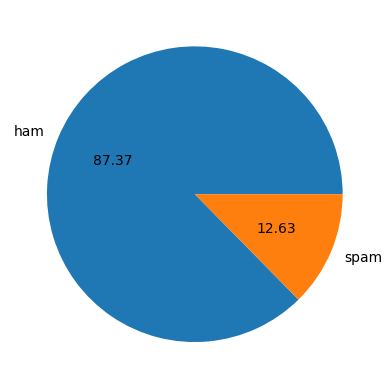

In [40]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saipr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [47]:
df['num_characters'] = df['Text'].apply(len)

C:\Users\saipr\AppData\Local\Temp\ipykernel_33688\3954161518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [50]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\saipr\AppData\Local\Temp\ipykernel_33688\1774492338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [52]:
df['num_sentence'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\saipr\AppData\Local\Temp\ipykernel_33688\827136732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [53]:
df.head()

,Target,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

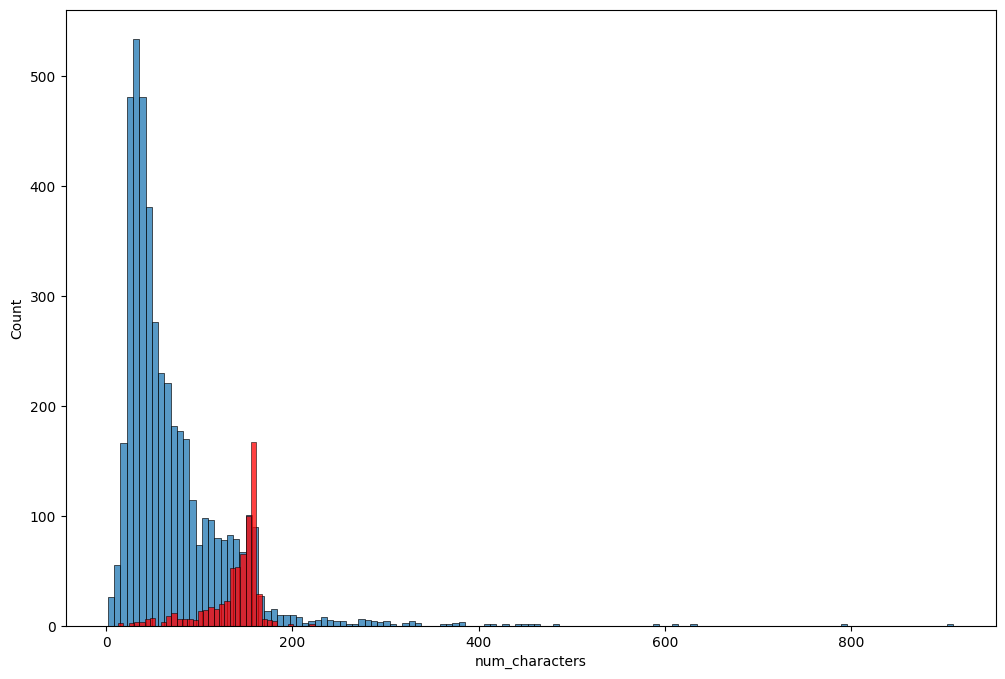

In [60]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color = 'red')

C:\Users\saipr\AppData\Local\Temp\ipykernel_33688\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

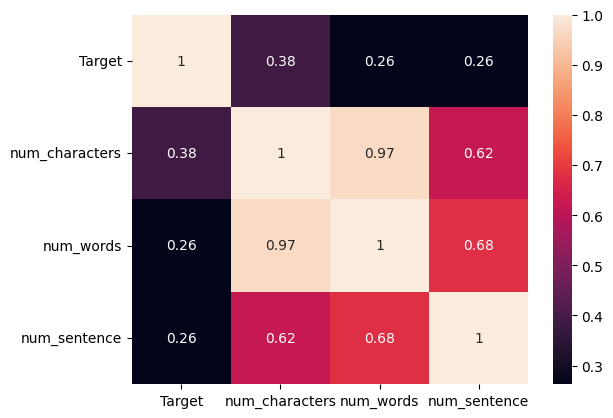

In [62]:
sns.heatmap(df.corr(), annot = True)

# 3. Data Preprocessing

In [78]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saipr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [82]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [83]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [84]:
df['transformed_text'] = df['Text'].apply(transform_text)

C:\Users\saipr\AppData\Local\Temp\ipykernel_33688\1893880433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['Text'].apply(transform_text)


In [85]:
df.head()

,Target,Text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [86]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [96]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


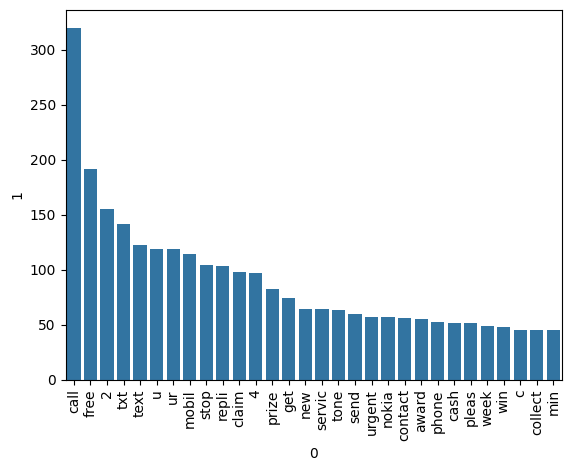

In [102]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [106]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [107]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


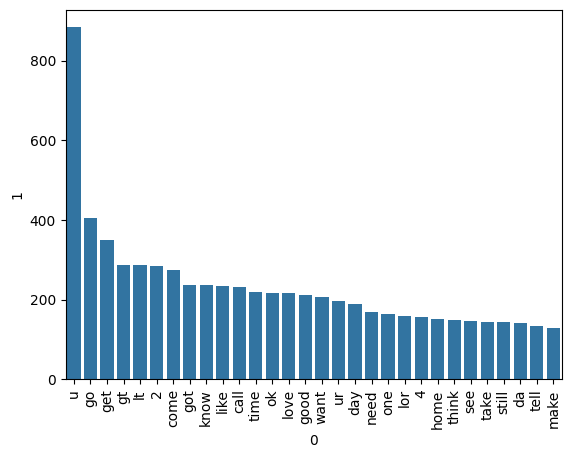

In [108]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model

In [151]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [152]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [153]:
X_ = tfidf.fit_transform(df['transformed_text']).toarray()

In [154]:
X.shape

(5169, 6708)

In [155]:
y = df['Target'].values

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [158]:
X__train, X__test, y_train, y_test = train_test_split(X_, y, test_size = 0.2, random_state = 2)

In [159]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [160]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [161]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [162]:
gnb.fit(X__train, y_train)
y_pred1 = gnb.predict(X__test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [163]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [164]:
mnb.fit(X__train, y_train)
y_pred1 = mnb.predict(X__test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [165]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [166]:
bnb.fit(X__train, y_train)
y_pred1 = bnb.predict(X__test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### Precision score is an important measure so we will choose MNB Model with TfidfVectorizer

In [169]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))